In [23]:
import pandas as pd
import numpy as np
import re

In [24]:
df = pd.read_csv('deceptive-opinion.csv')
df.sample(15)

,deceptive,hotel,polarity,source,text
752,deceptive,intercontinental,positive,MTurk,I am so glad I decided to stay at the Intercon...
132,truthful,knickerbocker,positive,TripAdvisor,My first trip back to Chicago in about 7 years...
1340,deceptive,sheraton,negative,MTurk,I recently stayed at the Sheraton Chicago Hote...
1140,truthful,palmer,negative,Web,How about this had reservation confirmation in...
782,deceptive,palmer,positive,MTurk,The Palmer House Hilton was recommended to me ...
366,truthful,palmer,positive,TripAdvisor,I booked this hotel for $75 on Hotwire with mi...
111,truthful,knickerbocker,positive,TripAdvisor,"We absolutely loved the Knickerbocker. Now, if..."
1521,deceptive,allegro,negative,MTurk,My daughter wanted to spend the weekend in Chi...
234,truthful,ambassador,positive,TripAdvisor,Just returned from 2 nights at the Ambassador ...
765,deceptive,palmer,positive,MTurk,We really enjoyed our stay at the Palmer House...


In [25]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [26]:
df.nunique()  # Unique Values in Columns:

deceptive       2
hotel          20
polarity        2
source          3
text         1596
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB


In [28]:
df.describe()

,deceptive,hotel,polarity,source,text
count,1600,1600,1600,1600,1600
unique,2,20,2,3,1596
top,truthful,conrad,positive,MTurk,My daughter and I woke in the morning wanting ...
freq,800,80,800,800,2


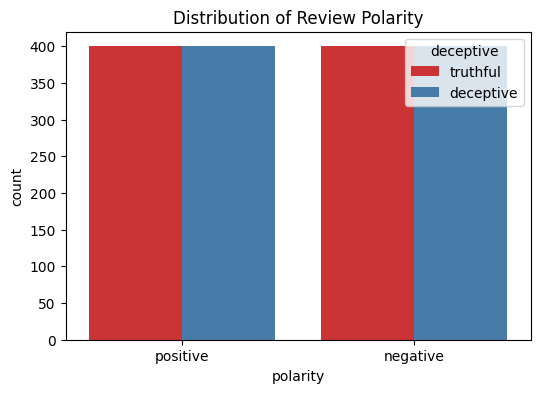

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing the distribution of the 'polarity' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='polarity', hue='deceptive', palette='Set1')
plt.title('Distribution of Review Polarity')
plt.show()

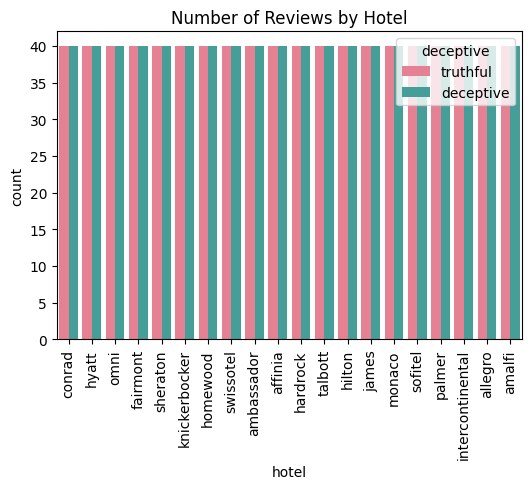

In [30]:

# Visualizing the distribution of reviews by hotel
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hotel', hue='deceptive', palette='husl', order=df['hotel'].value_counts().index)
plt.title('Number of Reviews by Hotel')
plt.xticks(rotation=90)
plt.show()


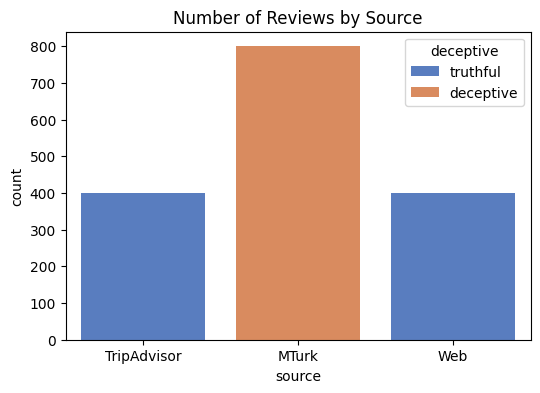

In [31]:
# Visualizing the distribution of reviews by source
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='source', hue='deceptive', palette='muted')
plt.title('Number of Reviews by Source')
plt.show()

In [32]:
# Checking the most common text entries (sample)
print("\nMost common review text:")
print(df['text'].value_counts().head(3))


Most common review text:
text
My daughter and I woke in the morning wanting to go swimming. When we arrived at the pool the water was covered by a white scum. I then attempted to use both of the phones at the pool, one white phone and one emergency red phone, to call the desk. Both were out of service!!!! I am glad there wasn't an emergency. As we were exited the pool area I ran into a hotel employee and told her about the problems and then asked her to call us when the pool was clean.... never heard back.\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [33]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Define stopwords
stopwords_set = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation
    text = re.sub('[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords_set]
    
    # POS Tagging (optional: select specific POS tags)
    tagged_words = nltk.pos_tag(words)
    # Filter out words by POS (for example, you could only keep nouns and verbs)
    filtered_words = [word for word, tag in tagged_words if tag in ['NN', 'VB', 'JJ']]  # Keep Nouns, Verbs, and Adjectives
    return ' '.join(filtered_words)

# Apply text cleaning
df['text'] = df['text'].apply(clean_text)

<>:14: SyntaxWarning: invalid escape sequence '\w'
<>:14: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Preet\AppData\Local\Temp\ipykernel_22536\2253280017.py:14: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('[^\w\s]', '', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Preet/nltk_data'
    - 'c:\\Users\\Preet\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\Preet\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\Preet\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Preet\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Classifier: Logistic Regression
Accuracy: 86.5625
Confusion Matrix 
 [[138  14]
 [ 29 139]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.83      0.91      0.87       152
    truthful       0.91      0.83      0.87       168

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



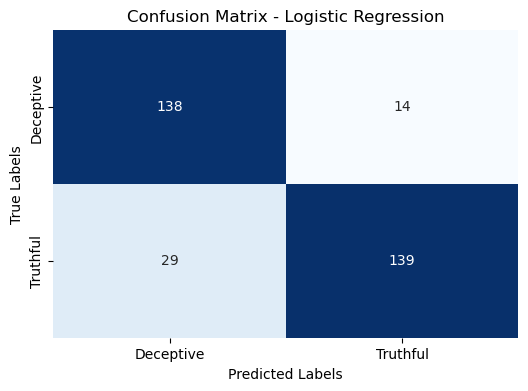

**************************************************
Classifier: Naive Bayes
Accuracy: 83.125
Confusion Matrix 
 [[143   9]
 [ 45 123]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.76      0.94      0.84       152
    truthful       0.93      0.73      0.82       168

    accuracy                           0.83       320
   macro avg       0.85      0.84      0.83       320
weighted avg       0.85      0.83      0.83       320



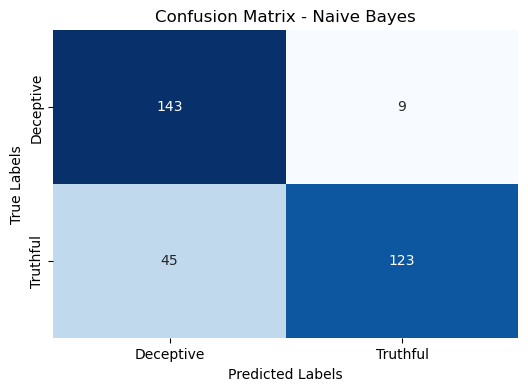

**************************************************
Classifier: k-Nearest Neighbors (k=5)
Accuracy: 71.875
Confusion Matrix 
 [[135  17]
 [ 73  95]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.65      0.89      0.75       152
    truthful       0.85      0.57      0.68       168

    accuracy                           0.72       320
   macro avg       0.75      0.73      0.71       320
weighted avg       0.75      0.72      0.71       320



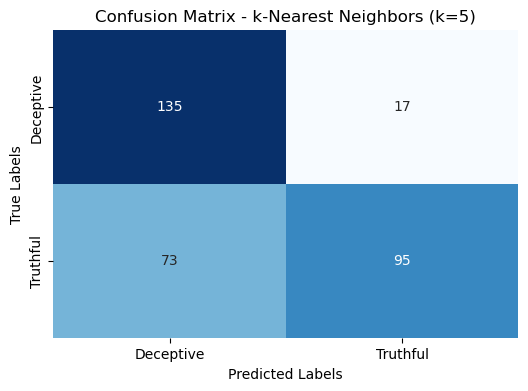

**************************************************
Classifier: Decision Tree
Accuracy: 60.3125
Confusion Matrix 
 [[103  49]
 [ 78  90]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.57      0.68      0.62       152
    truthful       0.65      0.54      0.59       168

    accuracy                           0.60       320
   macro avg       0.61      0.61      0.60       320
weighted avg       0.61      0.60      0.60       320



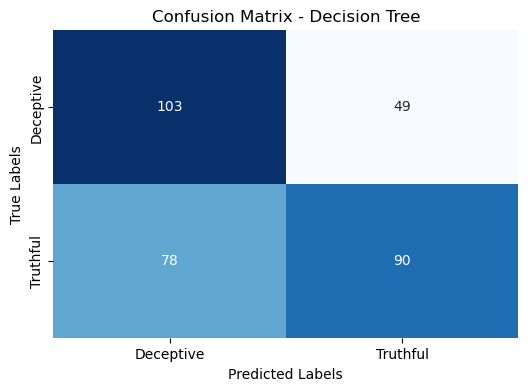

**************************************************
Classifier: Random Forest
Accuracy: 80.0
Confusion Matrix 
 [[132  20]
 [ 44 124]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.75      0.87      0.80       152
    truthful       0.86      0.74      0.79       168

    accuracy                           0.80       320
   macro avg       0.81      0.80      0.80       320
weighted avg       0.81      0.80      0.80       320



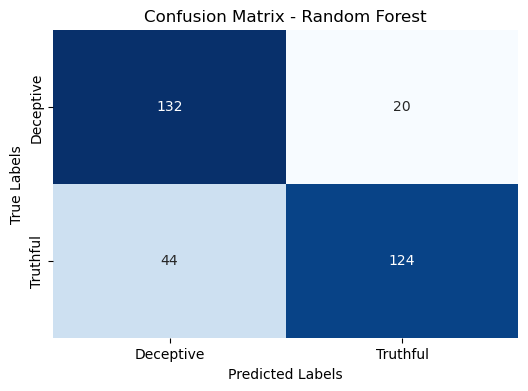

**************************************************
Classifier: Support Vector Machine
Accuracy: 85.0
Confusion Matrix 
 [[134  18]
 [ 30 138]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.82      0.88      0.85       152
    truthful       0.88      0.82      0.85       168

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



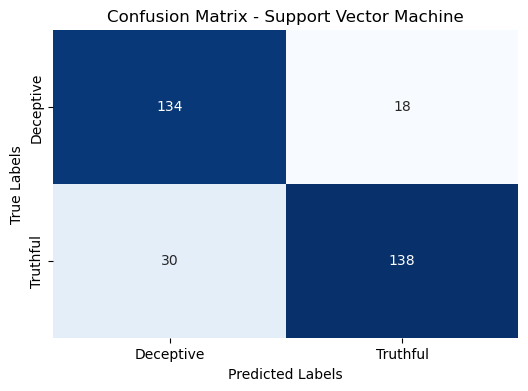

**************************************************


In [ ]:
from sklearn.metrics import confusion_matrix

# Training and evaluating each classifier with a color-coded confusion matrix
for name, classifier in classifiers.items():
    print(f"Classifier: {name}")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = classifier.score(X_test, y_test)
    print("Accuracy:", accuracy * 100)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix \n", conf_matrix)
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    # Visualizing the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Deceptive', 'Truthful'], 
                yticklabels=['Deceptive', 'Truthful'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    print("*" * 50)


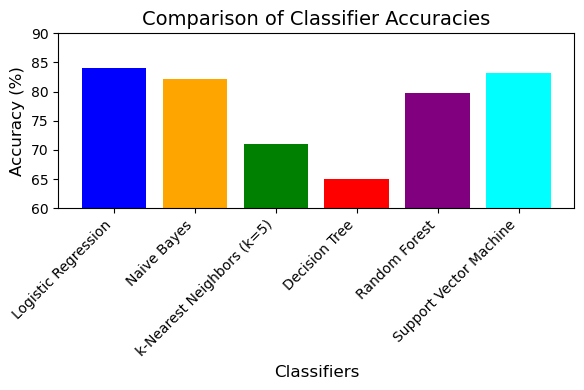

In [ ]:
classifiers = [
    "Logistic Regression", "Naive Bayes", "k-Nearest Neighbors (k=5)",
    "Decision Tree", "Random Forest", "Support Vector Machine"
]
accuracies = [84.0625, 82.1875, 70.9375, 65.0, 79.6875, 83.125]

# Plotting
plt.figure(figsize=(6,4))
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])

# Adding labels and title
plt.xlabel("Classifiers", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Comparison of Classifier Accuracies", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(60, 90)  # Setting y-axis limits for better visibility

# Displaying the chart
plt.tight_layout()
plt.show()